Build a Multiclass classifier using the CNN model. Use MNIST or
any other suitable dataset.

a. Perform Data Pre-processing 
b. Define Model and perform training 
c. Evaluate Results using confusion matrix.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report ,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

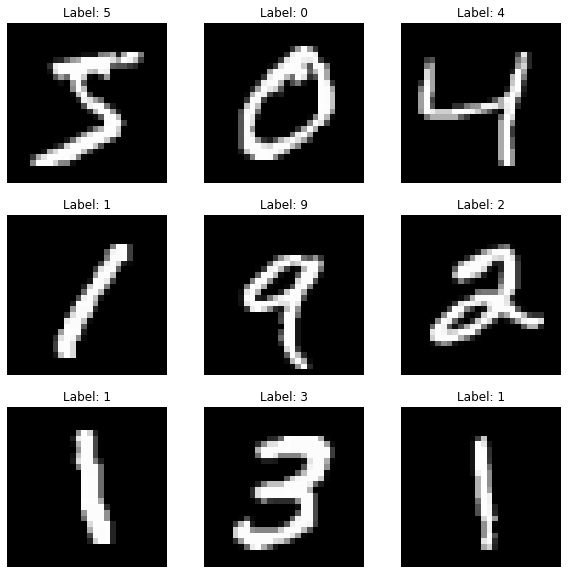

In [3]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()

In [4]:
# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

a:\Project\ML_project_01\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8406 - loss: 0.5254 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9823 - loss: 0.0567 - val_accuracy: 0.9859 - val_loss: 0.0480
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 0.9831 - val_loss: 0.0538


In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9815 - loss: 0.0548
Test Accuracy: 0.9846000075340271


In [9]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [10]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

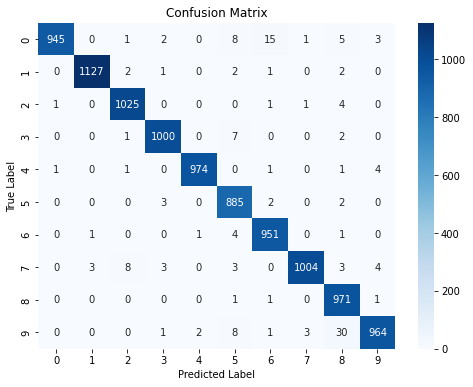

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       1.00      0.98      0.99      1028
           8       0.95      1.00      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
print("r2_score",r2_score(true_labels, predicted_labels))

r2_score 0.9680627637150502
